# Rad Lab

HH614 Geiger-Müller tube simulations

© 2025 by Gissio

## Settings

In [1]:
detector_geometry = "data/geometry.toml"
detector_label = "HH614"
N_montecarlo = 10000000

## Detector geometry

![J305 Geometry](data/geometry.png)

## Simulations

In [2]:
import sys
if '../../tools' not in sys.path:
    sys.path.append('../../tools')

import radlab

# %matplotlib widget

source_area = radlab.get_source_area(detector_geometry)
energies, efficiencies = radlab.simulate_gm_energies(
    detector_geometry, N_montecarlo)
angles, angular_response = radlab.simulate_gm_angles(
    detector_geometry, N_montecarlo)

## Detector efficiency

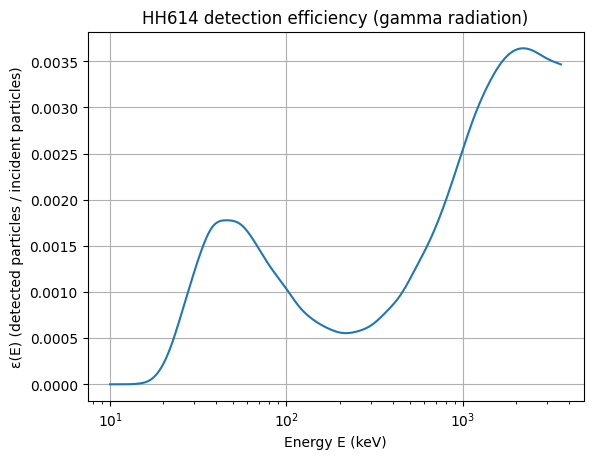

In [3]:
radlab.plot_semilogx(f'{detector_label} detection efficiency (gamma radiation)',
                     energies, efficiencies, "ε(E) (detected particles / incident particles)")

## Ambient dose equivalent sensitivity

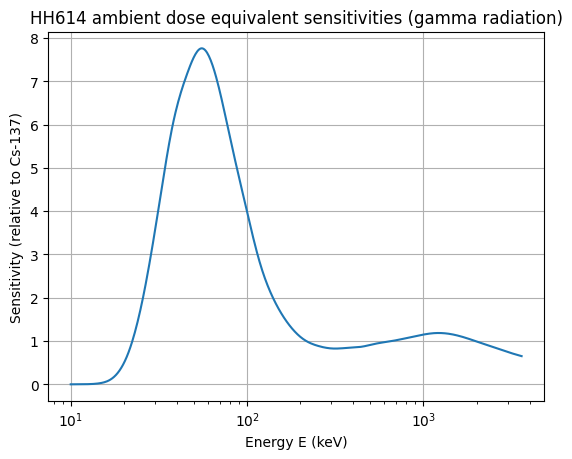

In [4]:
ambient_dose_equivalent_sensitivities = radlab.calculate_ambient_dose_equivalent_sensitivities(
    energies, efficiencies, source_area)

radlab.plot_semilogx(f'{detector_label} ambient dose equivalent sensitivities (gamma radiation)',
                     energies, ambient_dose_equivalent_sensitivities, "Sensitivity (relative to Cs-137)", normalize_cs137=True)

## Angular response

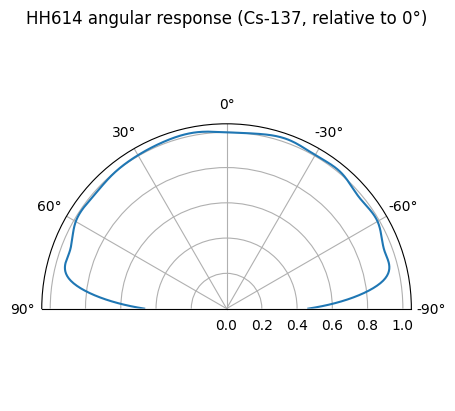

In [5]:
radlab.plot_polar(
    f'{detector_label} angular response (Cs-137, relative to 0°)', angles, angular_response)

## Sensitivity for various sources

In [7]:
source_sensitivities = radlab.calculate_source_sensitivities(
    energies, ambient_dose_equivalent_sensitivities)

radlab.print_source_sensitivities(source_sensitivities)

| Source | Sensitivity (cpm/µSv/h) | Relative sensitivity (Cs-137) |
|-|-|-|
| Cs-137 | 23.421 | 1.000 |
| Co-60 | 27.653 | 1.181 |
| Tc-99m | 78.362 | 3.346 |
| I-131 | 20.428 | 0.872 |
| Lu-177 | 32.292 | 1.379 |
| Am-241 | 155.979 | 6.660 |
| Radium | 23.341 | 0.997 |
| Uranium ore | 25.412 | 1.085 |
| Uranium glaze | 27.583 | 1.178 |
| Depleted uranium | 27.506 | 1.174 |
| Thorium ore | 12.598 | 0.538 |
| X-ray tube (60 kV) | 87.606 | 3.740 |
| K-40 | 27.007 | 1.153 |
| Natural background | 0.293 | 0.013 |
